In [1]:
#import dependencies
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
import psycopg2

In [3]:
# Create Connection
conn = psycopg2.connect(database="postgres", user="postgres", password="admin", host="127.0.0.1", port="5432")
print("Database opened successfully")

Database opened successfully


In [4]:
# Create a cursor object
cur = conn.cursor()

In [5]:
# A sample query of all data from the "homeless_edu" table in the "posgres" database 
cur.execute("""SELECT * FROM homeless_edu""")
homeless_edu = cur.fetchall()
print(homeless_edu)

[('2007_AL             ', 7069040, 7196459, 216941, 742919, '2007', 'AL', 8075, 3822, 11897), ('2007_AK             ', 1800616, 1938755, 42049, 131029, '2007', 'AK', 2995, 567, 3562), ('2007_AZ             ', 8724434, 8709531, 316376, 1087447, '2007', 'AZ', 17886, 14210, 32096), ('2007_AR             ', 4415981, 4779308, 138921, 479016, '2007', 'AR', 4979, 3545, 8524), ('2007_CA             ', 72516936, 73225422, 2011865, 6343471, '2007', 'CA', 102972, 215341, 318313), ('2007_CO             ', 7689014, 8039146, 236141, 801867, '2007', 'CO', 14346, 16154, 30500), ('2007_CT             ', 8913149, 8685421, 176592, 570626, '2007', 'CT', 7938, 2049, 9987), ('2007_DE             ', 1694929, 1705204, 37555, 122574, '2007', 'DE', 1784, 488, 2272), ('2007_DC             ', 1148358, 1140506, 20242, 78422, '2007', 'DC', 11399, 1001, 12400), ('2007_FL             ', 28898362, 29849892, 810952, 2666811, '2007', 'FL', 42900, 60701, 103601), ('2007_GA             ', 17755989, 17389530, 471012, 16495

In [3]:
# Create DataFrame
df = pd.DataFrame(homeless_edu, columns=["State_Year", 'TOTAL_REVENUE','TOTAL_EXPENDITURE','GRADES_PK_G','GRADES_KG_G','GRADES_4_G','GRADES_8_G','GRADES_12_G','GRADES_1_8_G','GRADES_9_12_G','GRADES_ALL_G', "Homeless_Count"])

#drop columns
df = df.drop(columns=['State'])
df.head()

,Year,TOTAL_REVENUE,TOTAL_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,Homeless_Count
0,2007,1800616,1938755,1679,9625,9420,9953,10092,77676,42049,131029,7124
1,2007,7069040,7196459,3592,55972,57795,58792,46200,466414,216941,742919,23794
2,2007,4415981,4779308,12795,38192,35710,35944,30708,288518,138921,479016,17048
3,2007,8724434,8709531,15854,86742,82876,81196,76275,668290,316376,1087447,64192
4,2007,72516936,73225422,68002,454743,467305,490054,468281,3801685,2011865,6343471,636626


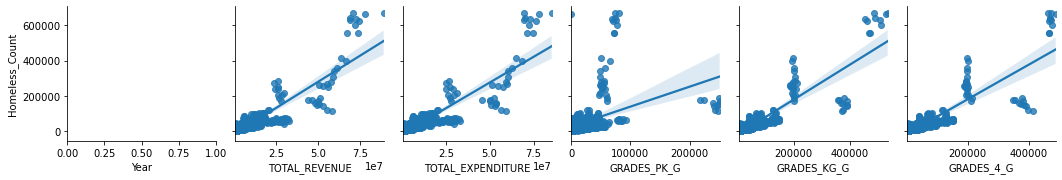

In [4]:
#see what variables have relationship with homeless count
sns.pairplot(df, x_vars=['Year','TOTAL_REVENUE','TOTAL_EXPENDITURE','GRADES_PK_G','GRADES_KG_G','GRADES_4_G'],y_vars='Homeless_Count',kind='reg')

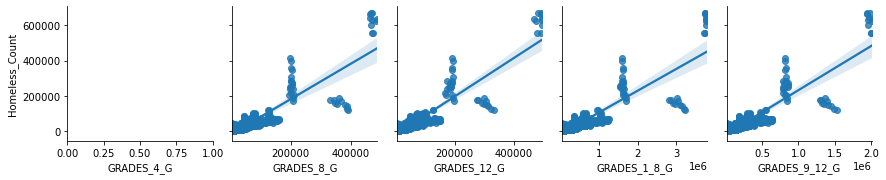

In [5]:
#see what variables have relationship with homeless count
sns.pairplot(df, x_vars=['GRADES_4_G','GRADES_8_G','GRADES_12_G','GRADES_1_8_G','GRADES_9_12_G'],y_vars='Homeless_Count',kind='reg')

In [6]:
#create features 
X = df.drop(columns=['Homeless_Count','GRADES_PK_G'])
y = df['Homeless_Count']

In [7]:
#split in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
#create encoder instance
scaler = StandardScaler()

In [9]:
#fit the scaler
X_scaler = scaler.fit(X_train)

In [10]:
#transform data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
#instantiate model
model = linear_model.LinearRegression()

In [12]:
#fit model
model.fit(X_train_scaled,y_train)

LinearRegression()

In [13]:
#generate predictions
y_pred = model.predict(X_test_scaled)

In [14]:
print(y_pred)

[ 2.93535411e+03  4.32604404e+04  5.73429565e+02  2.54370524e+04
  5.62945706e+05  6.66042694e+04  1.02499628e+04  3.01691787e+03
  1.49199694e+05  1.92033037e+05  3.72535810e+04  2.28756621e+04
  7.88772303e+04  6.18935487e+04  3.90179678e+04  2.93710343e+04
  6.58214785e+04  4.23744672e+03  2.10533492e+04  8.29489934e+03
  5.91633333e+05  2.25091000e+04  3.02944563e+05  2.75792046e+04
  3.66272147e+04 -3.70076367e+03  8.54678558e+04  5.03568700e+03
  1.48970214e+05  1.93863449e+05  1.81370008e+04  1.54331676e+05
  1.32868176e+04  3.57849426e+04  9.11073089e+04 -3.52290842e+03
  6.48628560e+04  6.11951500e+04  5.69296091e+03  5.21493120e+04
  8.33619116e+03  7.85561018e+04  3.13443200e+03  8.11329834e+04
  3.81829476e+03  8.23773025e+04  2.96359217e+04  8.90270023e+04
  2.56834916e+04  5.71727568e+04  1.23956422e+04  6.33673428e+04
  9.43199658e+03  2.49873272e+04  2.21523063e+04  2.19542825e+04
  3.38740374e+04  3.66052853e+03  7.01859637e+04  1.70568259e+04
  6.74108306e+04  3.91193

In [15]:
#get r2 value to determine if model is good fit
metrics.r2_score(y_test, y_pred)

0.9305073695569287

In [16]:
#print result of MAE (mean absolute error)
print(metrics.mean_absolute_error(y_test,y_pred))

20500.561647768216


In [17]:
#print result of MSE (mean squared error)
print(metrics.mean_squared_error(y_test,y_pred))

1019401083.2593496


In [18]:
#print result of RMSE (root mean squared error)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

31928.061063261415
